In [ ]:
Equilibrium figure similar to figure 1A

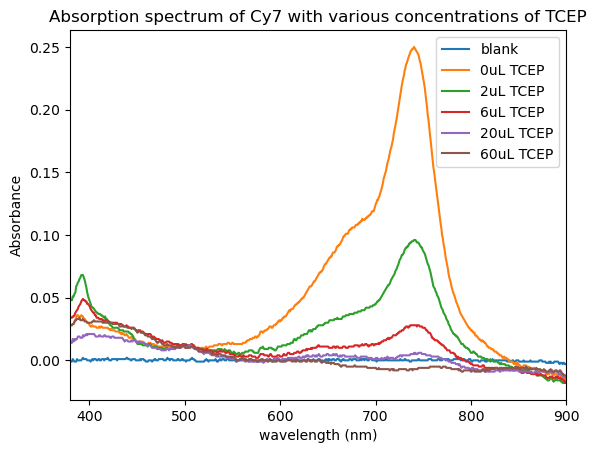

In [3]:
import numpy as np
import matplotlib.pyplot as plt

line_A = np.loadtxt('SOL_A.txt')
line_B = np.loadtxt('SOL_B.txt')
line_C = np.loadtxt('SOL_C.txt')
line_D = np.loadtxt('SOL_D.txt')
line_E = np.loadtxt('SOL_E.txt')
line_F = np.loadtxt('SOL_F.txt')

ax = plt.axes()
ax.set_xlim([380,900])
ax.plot(line_A[:,0], line_A[:,1],label='blank')
ax.plot(line_B[:,0], line_B[:,1],label='0uL TCEP')
ax.plot(line_C[:,0], line_C[:,1],label='2uL TCEP')
ax.plot(line_D[:,0], line_D[:,1],label='6uL TCEP')
ax.plot(line_E[:,0], line_E[:,1],label='20uL TCEP')
ax.plot(line_F[:,0], line_F[:,1],label='60uL TCEP')

plt.xlabel('wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('Absorption spectrum of Cy7 with various concentrations of TCEP')
ax.legend();

In [ ]:
Requenching (similar to figure 1c)

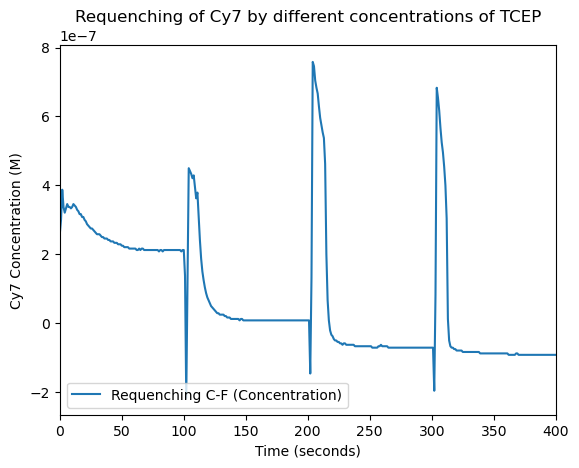

In [22]:
import numpy as np
import matplotlib.pyplot as plt


line_R = np.loadtxt('Requenching_C-F.txt')

extinction_coefficient = 240000  
path_length = 1  


concentration = line_R[:, 1] / (extinction_coefficient * path_length)


ax = plt.axes()
ax.set_xlim([0, 400])
ax.plot(line_R[:, 0], concentration, label='Requenching C-F (Concentration)')


plt.xlabel('Time (seconds)')
plt.ylabel('Cy7 Concentration (M)')
plt.title('Requenching of Cy7 by different concentrations of TCEP')
ax.legend()
plt.show()

In [ ]:
Equilibrium (Similar to 1b)

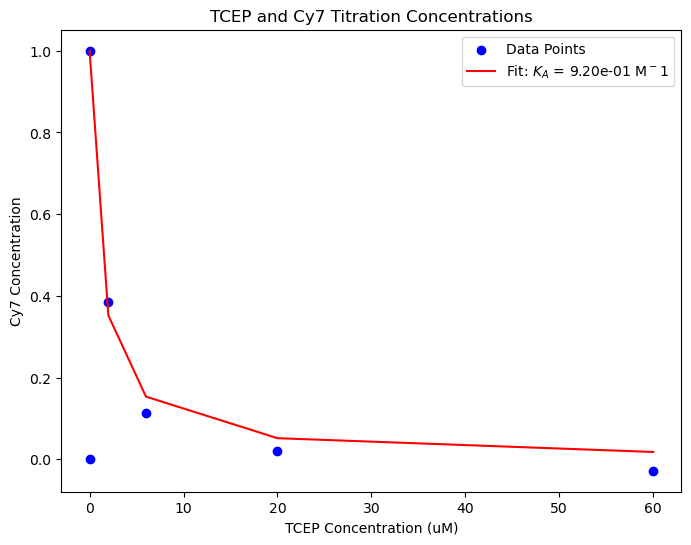

The association constant (K_A) is: 9.20e-01 M^-1


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

line_A = np.loadtxt('SOL_A.txt')
line_B = np.loadtxt('SOL_B.txt')
line_C = np.loadtxt('SOL_C.txt')
line_D = np.loadtxt('SOL_D.txt')
line_E = np.loadtxt('SOL_E.txt')
line_F = np.loadtxt('SOL_F.txt')

absorbance_values = np.array([
    line_A[447, 1],
    line_B[447, 1],
    line_C[447, 1],
    line_D[447, 1],
    line_E[447, 1],
    line_F[447, 1]
])

TCEP_concentrations = np.array([0, 0, 2, 6, 20, 60])

extinction_coefficient = 240000  
path_length = 1 

Cy7_concentrations = absorbance_values / (extinction_coefficient * path_length)

Cy7_init = max(Cy7_concentrations) 

normalized_Cy7 = Cy7_concentrations / Cy7_init

def binding_model(T, KA):
    return 1 / (KA * T + 1)


popt, pcov = curve_fit(binding_model, TCEP_concentrations, normalized_Cy7)
KA = popt[0]  


plt.figure(figsize=(8, 6))
plt.scatter(TCEP_concentrations, normalized_Cy7, color='blue', label='Data Points')
plt.plot(
    TCEP_concentrations,
    binding_model(TCEP_concentrations, KA),
    color='red',
    label=f'Fit: $K_A$ = {KA:.2e} M$^{-1}$'
)


plt.xlabel('TCEP Concentration (uM)')
plt.ylabel('Cy7 Concentration')
plt.title('TCEP and Cy7 Titration Concentrations')
plt.legend()
plt.show()

print(f"The association constant (K_A) is: {KA:.2e} M^-1")